***
# 機械学習
***

## 線形回帰モデル
+ ある一つの変数の値から別の変数を予測するモデル
  + 目的変数：予測したい変数
  + 説明変数：予測のベースとなる変数
+ 実測値（トレーニングデータ）を使ってモデル式のパラメータを推定
+ 単回帰分析：説明変数が1つで予測モデルを一次式（直線の式）
$ y = \alpha + \beta x $
で記述
  + 予測値と実測値の誤差が最小になるようにパラメータ
    $ (\alpha , \beta) $
    を推定（最小二乗法）
  + あるサンプルに対する予測値と実測値との誤差は  
    $$ e_i = y_i - \hat{y}_i = y_i - \alpha + \beta x_i $$ 
  + 全サンプルの予測値と実測値の誤差の2乗和は  
      \begin{equation}
      e^2 = \sum (y_i - \hat{y}_i)^2 =\sum ( y_i - \alpha - \beta x_i)^2 
      \end{equation}
  + この値が最小となる（勾配が0）となる $ (\alpha , \beta) $を計算する  
$$
\begin{eqnarray}
\frac{\partial}{\partial \alpha} \sum ( y_i - \alpha - \beta x_i)^2 &=& -2  \sum ( y_i - \alpha - \beta x_i) \\
&=& -2 \sum y_i + 2 \alpha \sum 1 + 2 \beta \sum x_i = 0 \tag{1} \\
\frac{\partial}{\partial \beta} \sum ( y_i - \alpha - \beta x_i)^2 &=& -2  \sum x_i ( y_i - \alpha - \beta x_i) \\
&=& -2 \sum x_i y_i + 2 \alpha \sum x_i + 2 \beta \sum x^2_i = 0 \tag{2}
\end{eqnarray}
$$
$\bar{x} = \frac{1}{n} \sum x_i , \bar{y} = \frac{1}{n} \sum y_i$ , (1)より
$\alpha = \bar{y} - \beta \bar{x}$．これを(2)に代入すると  
$$
\frac{1}{n} \sum x_i y_i - \bar{x}(\bar{y} - \beta \bar{x}) - \frac{1}{n} \beta \sum x^2_i
= \frac{1}{n} \sum x_i y_i  - \bar{x} \bar{y} - \beta \left( \frac{1}{n} \sum x^2_i 
- \bar{x}^2 \right) = 0
$$
以上より，
$$ \beta = \frac{Cov[x, y]} {V[x]}$$
  + 行列とベクトルを使った表現
$$
\boldsymbol{X} = \left( \begin{array}{ccc} 1 & x_1 - \bar{x} \\  \vdots  & \vdots  \\ 1 & x_n - \bar{x}  \end{array}  \right),~
\boldsymbol{y} = \left( \begin{array}{c} y_1\\ \vdots \\ y_n \end{array}\right), ~
\boldsymbol{w} = \left( \begin{array}{c} \alpha \\ \beta \end{array}\right), ~
\boldsymbol{e} = \left( \begin{array}{c} e_1 \\ \vdots \\ e_n \end{array} \right)
$$
とすると，
$$
\boldsymbol{e} = \boldsymbol{y} - \boldsymbol{X} \boldsymbol{w}  \\
e^2 = \boldsymbol{e}^T \boldsymbol{e} = (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{w})^T (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{w}) 
= \boldsymbol{y}^T \boldsymbol{y} - 2 \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{y} + \boldsymbol{w}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{w} \\
\frac{\partial}{\partial \boldsymbol{w}} \boldsymbol{e}^T \boldsymbol{e}
= -2 \boldsymbol{X}^T \boldsymbol{y} + 2 \boldsymbol{X}^T \boldsymbol{X}
\boldsymbol{w} = \textbf{ 0}
$$
よって，$\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1}  \boldsymbol{X}^T \boldsymbol{y}$
  
<br/>
  
+ データの分割
  + 学習データ：モデルの学習に利用
  + テストデータ：モデルの性能評価に利用（汎化性能）
+ データの分割方法
  + ホールドアウト法：データを学習データとテストデータに分割
    + 学習データを多くすると汎化性能が下がる
    + テストデータを多くするとモデルの学習精度が下がる
  + 交差検証（クロスバリデーション）：データを複数に分割し，1つをテストデータ，残りを学習データとする．分割したデータそれぞれがテストデータとなるように検証を複数回実行しその平均で性能を判断する  
  
<br/>
  


【参考文献】
1. 永田靖・棟近雅彦 共著『多変量解析法入門』サイエンス社　2001.04
2. 平井 有三『はじめてのパターン認識』森北出版　2012.07

In [ ]:
#numpy実装の回帰

import numpy as np
import matplotlib.pyplot as plt

def train(xs, ys):
    cov = np.cov(xs, ys, ddof=0)
    a = cov[0, 1] / cov[0, 0]
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

train関数
+ 学習データxs, ysで分散共分散行列を生成
+ 回帰式の傾き，切片を分散共分散行列から算出

## 非線形回帰モデル
+ モデルを直線の式では表現しきれない場合は基底関数を利用する  
$$ y = w_0 + w_1 x \Rightarrow y = w_0 + \sum w_i f_i(x)
$$
  + 基底関数
    + 多項式関数： $x$ の$n$乗の式  
$$ \boldsymbol{X} = \begin{pmatrix} x^0_{1} & x^1_{1} & \cdots & x^n_{1}\\ x^0_{2} & x^1_{2} & \cdots & x^n_{2}\\ 
\vdots & \vdots & \ddots & \vdots \\
x^0_{n} & x^1_{n} & \cdots & x^n_{n} \end{pmatrix} , ~~\boldsymbol{w} =
\left( \begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_n \end{array}\right)
=  (\boldsymbol{X}^T \boldsymbol{X})^{-1}  \boldsymbol{X}^T \boldsymbol{y}
$$
    + ガウス基底関数：ガウス分布式  
$$
f_j (x_i) = \exp \left\{ - \frac{(x_i - \mu_j)^2}{2 \sigma^2} \right\}, ~~
\boldsymbol{X} =\begin{pmatrix} f_1(x_{1}) & f_2(x_{1}) & \cdots & f_m(x_{1})\\ 
f_1(x_{2}) & f_2(x_{2}) & \cdots & f_m(x_{2})\\ 
\vdots & \vdots & \ddots & \vdots \\
f_1(x_{n}) & f_2(x_{n}) & \cdots & f_m(x_{n}) \end{pmatrix}
$$
  ここで$ \mu_i$は基底関数の中心位置で$\sigma$は基底関数の広がりの幅を決めるパラメータ（正規分布でいう標準偏差のようなもの）   

      $x$  の次数は高次となるが， $w$については1次のままなので単回帰と同じように扱える

+ 過学習
  + 学習モデルの表現力を上げていくと誤差関数の値は小さくすることができるが，汎化性能が下がってしまう
  + 正則化：誤差関数に罰則項を加えることで過度の学習を防ぐ（制約付き最適化問題）
$$
E(\boldsymbol{w}) = \frac{1}{2} \sum \left\{ y_n - \boldsymbol{w}^T f(x_n)\right\}^2 + \lambda \sum \left\lvert w_j \right\rvert ^q
$$
    q=1: L1ノルム（ラッソ回帰），q=2: L2ノルム（リッジ回帰） 
    + q=2のとき，$\boldsymbol{w} = \left( \lambda \boldsymbol{I} + \boldsymbol{X}^T \boldsymbol{X}\right)^{-1} \boldsymbol{X}^T \boldsymbol{y}$
    + q=1のとき，特徴量の重みが閾値内の場合0となる（スパース正則化）
    + グリッドサーチ：各パラメータの値を予め複数用意しておき，各パラメータ値の組み合わせを変えて学習させ，性能が良いモデルを探索する．




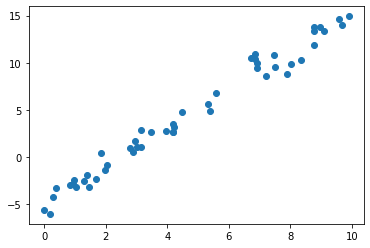

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1) # [4] p393
x = 10 * rng.rand(50) # 一様分布でランダム
y = 2 * x -5 + rng.randn(50) #標準正規分布でランダム

plt.scatter(x, y)
plt.show()

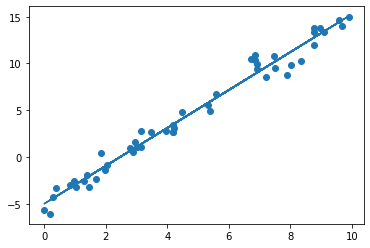

In [ ]:
X = np.concatenate([np.ones(x.shape[0]).reshape(-1, 1), x.reshape(-1,1)], 1)
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def predict(x, w):
    return w[0] + w[1] * x

plt.scatter(x, y)
plt.plot(x, predict(x, w))
plt.show()

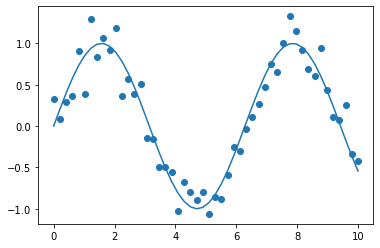

In [ ]:
rng = np.random.RandomState(1)
x = np.linspace(0, 10, 50)
y = np.sin(x) + rng.randn(50) * .2

plt.scatter(x, y)
plt.plot(x, np.sin(x))
plt.show()

In [ ]:
# 多項式カーネル
def predict_poly(x, y, n):
    x_array = np.array([x**i for i in range(n+1)])
    X = x_array.T
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    print("n={}, w={}".format(n, w))
    return w.dot(x_array)

n=1, w=[ 0.22020829 -0.01022969]
n=2, w=[ 0.81191069 -0.37264741  0.03624177]
n=3, w=[ 1.1711502  -0.82682424  0.15094045 -0.00764658]
n=4, w=[-0.11728968  2.00815073 -1.15503396  0.1968488  -0.01022477]
n=5, w=[-3.04130171e-01  2.66039545e+00 -1.63011088e+00  3.25391910e-01
 -2.47554658e-02  5.81227864e-04]


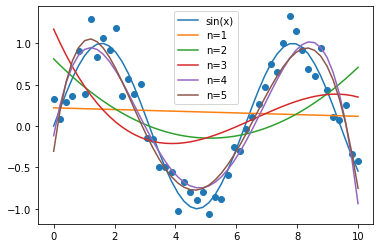

In [ ]:
plt.scatter(x, y)
plt.plot(x, np.sin(x), label="sin(x)")
for n in range(1, 6):
    plt.plot(x, predict_poly(x, y, n), label="n={}".format(n))
plt.legend()
plt.show()

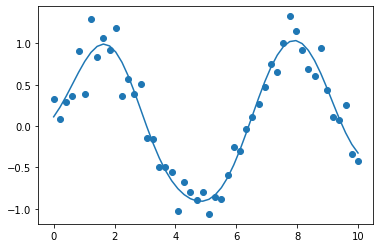

In [ ]:
# ガウスカーネル

# ガウスカーネルの定義
def gaussian_kernel(x, mu, s):
  return np.exp(-0.5*((x - mu)/s)**2)


# 計画行列の作成
def design_matrix(x, n):
  u = np.linspace(x.min(), x.max(), n)
  sigma = (x.max() - x.min()) / n

  return np.array([gaussian_kernel(x, m, sigma) for m in u]).T

def predict_gauss(x, y, n=10):
    X = design_matrix(x, n)
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w.dot(X.T)
  
plt.scatter(x, y)
plt.plot(x, predict_gauss(x, y))
plt.show()

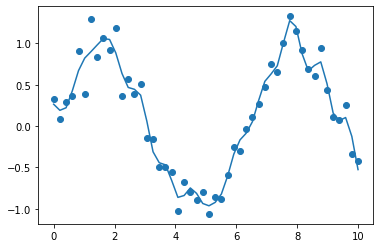

In [ ]:
# ガウスカーネル　オーバフィット
plt.scatter(x, y)
plt.plot(x, predict_gauss(x, y, 28))
plt.show()

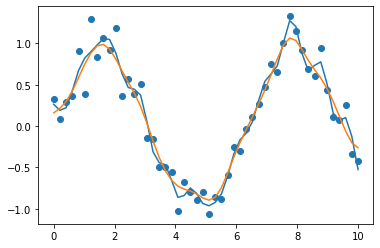

In [ ]:
# L2ノルムの罰則項を追加

def predict_gauss_l2(x, y, n=10, l=2):
    X = design_matrix(x, n)
    w = np.linalg.inv(l * np.eye(n) + X.T.dot(X)).dot(X.T).dot(y)
    return w.dot(X.T)

plt.scatter(x, y)
plt.plot(x, predict_gauss(x, y, 28), label="gauss")
plt.plot(x, predict_gauss_l2(x, y, 28, 0.5), label="gauss+L2")
plt.show()


[ 0.0228467   0.          0.12093598  0.49754708  0.18498878  0.67901515
  0.06512706  0.16923115  0.          0.         -0.16376676 -0.4440486
 -0.21154783 -0.21864734 -0.54068021 -0.29610063  0.          0.
  0.          0.24410688  0.04403698  0.9911796   0.          0.4023845
  0.1756738   0.          0.         -0.05155797]


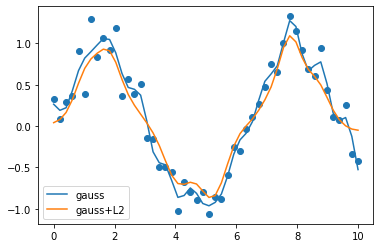

In [ ]:
# L1ノルムの罰則項を追加

def predict_gauss_l1(x, y, n=10, l=0.5):
    X = design_matrix(x, n)
    N, d = X.shape
    w = np.zeros(d)
    l = 0.5

    for _ in range(100):
      for n in range(d):
        if n == 0:
          w[n] = (y - np.dot(X[:,1:], w[1:])).sum() / N
        else:
          D = np.dot(X[:, n], y - np.dot(X, w) + X[:, n] * w[n])
          if -l <= D <= l:
            w[n] = 0
          else:
            E = np.dot(X[:, n], X[:, n])
            if D < -l:
              w[n] = (D + l) / E
            else:
              w[n] = (D - l) / E

    print(w)
    return w.dot(X.T)

plt.scatter(x, y)
plt.plot(x, predict_gauss(x, y, 28), label="gauss")
plt.plot(x, predict_gauss_l1(x, y, 28, 0.2), label="gauss+L1")
plt.legend()
plt.show()

【参考文献】
1. C.M.ビショップ著[元田浩ら監訳]『パターン認識と機械学習 上』丸善　2012.01
2. 中井悦司著『ITエンジニアのための機械学習理論入門』技術評論社　2015.11
3. Ian Goodfellowら［黒滝 紘生ら訳］『深層学習』ドワンゴ　2018.02
4. Jake VanderPlas著、菊池 彰訳 『Pythonデータサイエンスハンドブック』O'Reilly Japan　2018.05
5. Aurélien Géron著、下田 倫大監訳、長尾 高弘訳『scikit-learn、Keras、TensorFlowによる実践機械学習』O'Reilly Japan　2018.04
6. 「L1正則化（Lasso）の数式の解説とスクラッチ実装」 https://qiita.com/torahirod/items/a79e255171709c777c3a

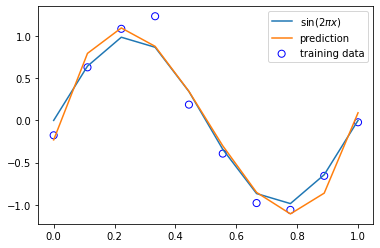

In [ ]:
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    X_t = X.T #(100, 4)
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
    return X_t.T


n_sample = 10
var = .25

def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

Phi = polynomial_features(xs)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

Phi_test = polynomial_features(xs)
ys_pred = np.dot(Phi_test, w)

plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")

plt.legend()
plt.show()

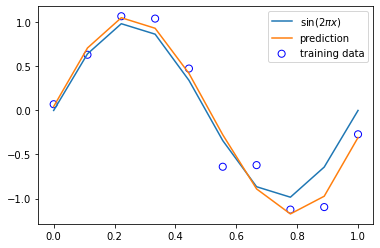

In [ ]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

Phi = polynomial_features(xs, 5)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

Phi_test = polynomial_features(xs, 5)
ys_pred = np.dot(Phi_test, w)

plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")

plt.legend()
plt.show()

polynomial_features関数
+ 多項式の各項を別々の変数として扱いうことで，重回帰分析と同じ処理が可能
+ 要素1の行列に多項式の行列を掛け合わせる
+ 引数degreeの値を大きくすると学習データにオーバーフィッティング
  
<br/>  

重みの計算  
+ ベクトル演算処理による算出

## ロジスティック回帰モデル
+ 回帰関数をシグモイド関数で{0, 1}の範囲に変換し，閾値0.5で分類する
  + シグモイド関数：$\sigma(a) = \frac{1}{1 + \exp(-a)} = \frac{\exp(a)}{1 + \exp(a)}$
    + 勾配の計算
$$ \begin{eqnarray}
\frac{d}{d a} \sigma(a) &=& \frac{ \exp(-a)}{(1 + \exp(-a))^2} 
= \left\{ \frac{1}{1 + \exp(-a)}\right\} \left\{ 1- \frac{1}{1+\exp(-a)}\right\} \\ &=& \sigma(a)( 1 - \sigma(a))
\end{eqnarray}
$$
    + 事後確率との関係
      + クラスC1，C2の2値分類において，  
  $ a = \log \frac{P(\boldsymbol{x}\mid C_1) P(C_1)}{P(\boldsymbol{x} \mid C_2) P(C_2)}$とおくと，
$$
\sigma(a) = \frac{1}{1 + \exp(-a)} = P(C_1 \mid \boldsymbol{x})
$$
+ 最尤推定
  + 手元のN個のデータが出現する確率はそれぞれのデータが出現する確率の積（同時確率）
  + $y_i \in (0, 1)$が確率 で出現するベルヌーイ試行をN回実施した場合
$$
L(\boldsymbol{w}) = \prod_{i=1}^{N} p_i^{y_i} (1 - p_i)^{1- y_i}
$$
対数をとり，-1を掛けると
$$
-\log L(\boldsymbol{w}) = -\sum_{i=1}^{N} {y_i}\log p_i  - \sum_{i=1}^{N} (1- y_i) \log (1 - p_i)
$$
ここで，$p_i = \sigma(a_i), a_i = \boldsymbol{w}^T \boldsymbol{x}_i$だから
$$\begin{eqnarray}
\frac{\partial p_i}{\partial a_i} &=& \frac{\partial}{\partial a_i} \sigma(a_i) = \sigma (a_i)(1-\sigma(a_i)) = p_i (1-p_i) \\
\frac{\partial a_i}{\partial \boldsymbol{w}} &=& \frac{\partial}{\partial \boldsymbol{w}}
\boldsymbol{w}^T \boldsymbol{x}_i = \boldsymbol{x}_i
\end{eqnarray}$$
  以上を利用して，
$$
\frac{\partial}{\partial \boldsymbol{w}} \left\{ - \log L(\boldsymbol{w})\right\} = \sum_{}^{} \left\{\frac{(1 - y_i)}{1- p_i} - \frac{y_i}{p_i} \right\}p_i (1-p_i) \boldsymbol{x}_i = \sum (p_i - y_i) \boldsymbol{x}_i = 0
$$
  となる$w$を最急降下法で求める．
    + この関数は交差エントロピー誤差関数でもある
+ 混同行列(confusion matrix)：性能評価の指標

| | |真のクラス||
|:---:|:---:|:---:|:---:|
|||+|-|
|**予測クラス**|+|True Positive|False Positive|
||-|False Negative|True Negative|
  
  + 適合率(precision)：TP / (TP + FP)　…　+と予測したものが実際に+である割合
  + 再現率(recall)：TP / (TP + FN)　…　実際の+をどの程度の割合で正解できるか
  + 正解率(accuracy)：(TP + TN) / (TP + FP + FN + TN)　…　+-を正しく分類できる割合
  + F値(F-measure)：2(precision * recall) / (precision + recall)…precisionとrecallの調和平均

<br/>  

+ 特徴量の作成
  + 欠損値の対応
    + 代表値で補完する（平均値・中央値）
    + 他の変数から予測する…特徴量を予測するモデルを作成
  + 数値変数の変換
    + 標準化：データのスケールを統一することで変数による重みへの影響を同一にする
  + カテゴリ変数の変換
    + one-hot encoding：カテゴリ変数の各値を新しい変数とし，その値かどうかを0, 1で表現する
    + label encoding：カテゴリ変数の各値を数値に置き換える
  + 変数の組み合わせ
    + 変数同士の和や差，積を新たな変数とする

<br/>  


【参考文献】
1. 平井 有三『はじめてのパターン認識』森北出版　2012.07
2. C.M.ビショップ著[元田浩ら監訳]『パターン認識と機械学習 上』丸善　2012.01
3. 門脇大輔ら著『Kaggleで勝つデータ分析の技術』技術評論社　2019.10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sgd(X_train, max_iter, eta):
    w = np.zeros(X_train.shape[1])
    for _ in range(max_iter):
        w_prev = np.copy(w)
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))
        w -= eta * grad
        if np.allclose(w, w_prev):
            return w
    return w

sgd関数
+ 0で初期化した重み用のベクトルを用意
+ 指定回数更新処理を実行  
  + 更新処理判定用として重みベクトルをコピー
  + 学習データの入力行列と重みベクトルとの内積にシグモイド関数を適用⇒ベクトル
  + 予測結果ベクトルと学習データの出力ベクトルとの誤差（ベクトル）と学習データの入力行列との内積をとるとこれが勾配ベクトルとなる
  + この勾配ベクトルに学習率を掛けたもで重みベクトルを更新

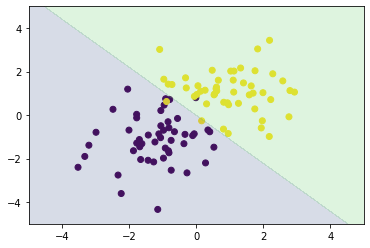

In [ ]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

n_sample = 100
harf_n_sample = 50
var = .2

def gen_data(n_sample, harf_n_sample):
    x0 = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=n_sample).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)
    return x_train, y_train

x_train, y_train = gen_data(n_sample, harf_n_sample)

X_train = add_one(x_train)
max_iter=100
eta = 0.01
w = sgd(X_train, max_iter, eta)

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = add_one(xx)
proba = sigmoid(np.dot(X_test, w))
y_pred = (proba > 0.5).astype(np.int)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))

meshgrid関数  
+ グラフの領域の色分け用に生成．contourf関数の引数として利用
+ 軸方向の配列を引数として受け取り，格子点状の座標行列のリストを返す
+ 3次元グラフや等高線図の作成に利用
  
予測の際にシグモイド関数の結果を0.5で振り分け[0, 1]に変換（True=1, False=0)  
結果のクラス分け（色分け）を等高線図で表現

## 主成分分析
+ 学習データの特徴を保持しつつ，次元を縮約する方法  
学習データを線形変換で射影したときに分散が最大となる直線を探す
+ データの中心化
データの平均が0となるように各データとデータの平均との差をとる
学習データの行列を$\boldsymbol{X} = ( \boldsymbol{x}_1 , \dots , \boldsymbol{x}_N)^T$として，平均ベクトルを$\bar{\boldsymbol{x}}$とし，平均との差の行列を$\boldsymbol{Y} = ( \boldsymbol{x}_1 -  \bar{\boldsymbol{x}} , \dots , \boldsymbol{x}_{N} -  \bar{\boldsymbol{x}})^T$とする
+ 線形変換による学習データの射影される直線  
学習データは方向ベクトルの直線上に射影されるとすると直線上の線形変換後学習データは$\boldsymbol{s} = \boldsymbol{Y}\boldsymbol{a}$とおくことができる
+ 変換後データの分散  
変換後のベクトル  の分散は，
$$Var[\boldsymbol{s}] = \frac{1}{N} \boldsymbol{s}^T \boldsymbol{s}
=\frac{1}{N}  \left( \boldsymbol{Y} \boldsymbol{a} \right)^T\left( \boldsymbol{Y} \boldsymbol{a}\right)
= \frac{1}{N} \boldsymbol{a}^T  \boldsymbol{Y}^T \boldsymbol{Y} \boldsymbol{a}
= \boldsymbol{a}^T Var[\boldsymbol{Y}] \boldsymbol{a}
$$
  と変形できる
+ 最適化問題  
この分散最大化問題を射影方向ベクトルの大きさ1の制約のもとで解く
$L(\boldsymbol{a}) = \boldsymbol{a}^T Var[\boldsymbol{Y}] \boldsymbol{a}- \lambda ( \boldsymbol{a}^T \boldsymbol{a} -1)$を $\boldsymbol{a}$で偏微分して勾配が0となるとき  
$$\frac{\partial}{\partial  \boldsymbol{a}} L( \boldsymbol{a}) 
= 2 Var[ \boldsymbol{Y}]  \boldsymbol{a} -2  \lambda   \boldsymbol{a} = \textbf{0}
$$
 より，$Var[\boldsymbol{Y}] \boldsymbol{a}  =  \lambda  \boldsymbol{a}$
  
  以上より，この最適化問題は固有値問題に帰着する
  
<br/>




【参考文献】  
1. 永田靖・棟近雅彦 共著『多変量解析法入門』サイエンス社　2001.04
2. 平井 有三『はじめてのパターン認識』森北出版　2012.07
3. C.M.ビショップ著[元田浩ら監訳]『パターン認識と機械学習 下』丸善　2012.01

## k-近傍法
+ 教師あり学習
+ 学習データにおいて，入力データの最近傍k個のデータの最も多く所属するクラスに分類
 - 同じ学習データであってもkの値によって分類されるクラスが変化することもある
+ 学習データと入力データとの距離計算
 - 分枝法
    - 学習データを木構造のクラスタを作成．
    - 各ノードにはノード以下全体の平均ベクトルと平均ベクトルからの最大距離を属性を保持
  - 限定法
    - 分枝法を利用する
    - 木構造から最も近いクラスタを探索

<br/>
  


【参考文献】
1. 平井　有三『はじめてのパターン認識』森北出版　2012.07  
  関連Slide Share https://www.slideshare.net/moa108/5-kknn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1 
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1]) 
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

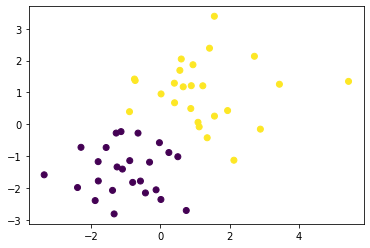

In [ ]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

gen_data関数内  
+ normal関数  
50サンプルを正規分布で生成し，25*2の配列に変換後±1．分布の平均を0から±1したのと同じ
+ concatenate関数  
配列の結合．2つの2次元配列を縦に結合，50*2の配列
+ zeros関数，ones関数  
値0の配列，値1の配列を生成

In [ ]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

distance関数  
+ sum()関数のkeyword引数axisは0が列ごとに演算，1は行ごとに演算する  
+ 座標x1とx2の距離を計算する  
  

knc_predict関数  
+ y_pred: 予測結果を保持する配列をempty()関数で生成
+ 学習データのそれぞれの値について最近傍の値を抽出
  - argsort(): 配列をソートした結果のインデックスを要素とする配列を返す

## k-means
+ 教師なし学習
+ データをk個のクラスタに計算によって分類
+ 計算アルゴリズム
  1. 各クラスの代表値をk個設定
  2. 各データに対しk個の代表値との距離を計算し，最短距離の代表値であるクラスに割当
  3. 割当たクラスごとの平均値を新たな各クラスの代表値とする
  4. 収束条件を満たすまで，2, 3を繰り返す
+ 代表値の初期設定により出来上がる結果が変化するので複数回実施する必要あり

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

#データ作成
X_train = gen_data()

def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

ソースコード分析  
教師データから各クラスタの中心となるベクトルをランダムで抽出
numpy.random.choice関数
+ 第1引数の配列から第2引数で指定した数の要素を抽出した値または配列を返す

ループ処理
+ 2点間距離を格納する0で初期化した配列を生成
+ 入れ子ループの1つ目
  + 教師データの各ベクトルと各クラスターの中心との距離を計算する
+ 各ベクトルの所属クラスターを更新
+ 入れ子ループの2つ目
  + 各クラスターの中心を再定義
  + 各クラスターごとに各ベクトルが所属しているかどうかの真偽値配列を使ってグループ化
+ 全てのクラスターの中心が更新されなければループは終了


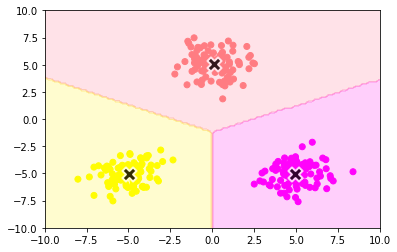

In [4]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

【参考文献】
1. 平井　有三『はじめてのパターン認識』森北出版　2012.07  

## サポートベクトルマシン
+ 教師あり学習
+ 基本的には2値分類．多値分類にも拡張可能
+ データを特徴ベクトルで表現し，この特徴ベクトル空間を分離する超平面を求める
  - 2次元ベクトル空間で考える

    特徴ベクトルを2つのクラス
$t \in \lbrace +1, -1 \rbrace $を分類する直線を
$ \boldsymbol{w}^T \boldsymbol{x} + b = 0$
とすると，この直線に最も近いクラス+1の特徴ベクトルと直線との距離とこの直線に最も近いクラス-1の特徴ベクトルと直線との距離はどちらも等しいく$d$と表すことができる．（直線に最も近い特徴ベクトルのことをサポートベクトルと呼ぶ）
    ここで，直線の法線ベクトルとバイアス項
$\boldsymbol{w}, b$を$d$で割ったものを新たに$\boldsymbol{w}, b$とおくとそれぞれのクラスに分類される特徴ベクトル$\boldsymbol{x}_i$と直線との関係式は
$$ t_i( \boldsymbol{w}^T \boldsymbol{x}_i + b ) \ge 1 $$と表せる．
  
    また，サポートベクトルと直線との距離は
$$\frac{\left |\boldsymbol{w}^T \boldsymbol{x}_i + b \right |}{\| \boldsymbol{w} \|} = \frac{1}{\| \boldsymbol{w} \|}
$$
と表すことができるので，$\| \boldsymbol{w} \|$が最小となる$\boldsymbol{w}$を求める問題に帰着される．
  - 不等式制約条件最適化問題と双対問題

   $\| \boldsymbol{w} \|$を最小化する問題において，評価関数を$L(\boldsymbol{w})=\frac{1}{2}\boldsymbol{w}^T \boldsymbol{w}$，不等式制約条件を$t_i( \boldsymbol{w}^T \boldsymbol{x}_i + b ) \ge 1$ とするとラグランジュ乗数は，
$$
L(\boldsymbol{w}, b, \boldsymbol{\alpha})=\frac{1}{2} \boldsymbol{w}^T \boldsymbol{w} - \sum_{i=1}^{N}\alpha_i(t_i( \boldsymbol{w}^T \boldsymbol{x}_i + b )-1)
$$
となり，これを解くと，
$$
\boldsymbol{w}_0 = \sum_{i=1}^{N} \alpha_i t_i \boldsymbol{x}_i
$$
が導出され，これを元の式に代入すると双対問題
$$
\begin{eqnarray}
L(\boldsymbol{\alpha}) &=& \frac{1}{2}\boldsymbol{w}_0^T \boldsymbol{w}_0 - \sum_{i=1}^{N} \{\alpha_i t_i \boldsymbol{w}_0^T \boldsymbol{x}_i - b \alpha_i t_i + \alpha_i\} 
\\ &=& \sum_{i=1}^{N}\alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N}\alpha_i \alpha_j t_i t_j \boldsymbol{x}_i^T \boldsymbol{x}_j
\end{eqnarray}
$$
が得られる．ただし，制約条件は，$\sum_{i=1}^{N}\alpha_i t_i = 0, \alpha_i \ge0$  
ここで，$t_i( \boldsymbol{w}^T \boldsymbol{x}_i + b ) = 1$ を満たすサポートベクトルについてのみラグランジュ係数が$\alpha_i \ne 0$となり，最適解を$\tilde{\boldsymbol{\alpha}}$とすると，
$$
d_{max} = \frac{1}{\| \boldsymbol{w} \|} = \frac{1}{\sqrt{\sum_{i=1}^{N} \tilde{\alpha}_i}}
$$
となる．
 - ソフトマージン最適化
    + 線形分離できない特徴ベクトルについて，スラック変数を導入する方法．
    + このときの評価関数は，$\frac{1}{2} \boldsymbol{w}^T \boldsymbol{w} + C \sum_{i=1}^{N}\xi_i$
    + 制約条件は， $t_i(\boldsymbol{w}^T \boldsymbol{x}_i + b) \ge 1- \xi_i$，$\xi_i \ge 0$
    + 双対ラグランジュ関数はハードマージンと同じとなる．
  - カーネル法
    + 線形分離できない特徴ベクトルについて，非線形変換を用いて次元拡張する方法．線形カーネル，多項式カーネル，RBFカーネル，シグモイドカーネルなど．
  - サポートベクトル 

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

X_train, ys_train = gen_data()

t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

ソースコード分析  
numpy.outer関数
+ 第1引数と第2引数の配列の全ての組み合わせの積を要素とする行列を生成

ループ処理
+ 双対問題を最急降下法（拡張ラグランジュ法）で処理

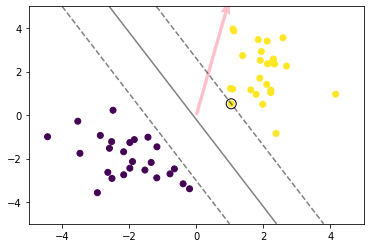

In [7]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

【参考文献】
1. 平井　有三『はじめてのパターン認識』森北出版　2012.07  
2. Nello Cristianiniら著 大北訳『サポートベクターマシン入門』 共立出版 2005.03
3. 高村 大也『言語処理のための機械学習入門』コロナ社 2008.08 